In [19]:
import matplotlib.pyplot as plt

#  два графика 
def two_histograms(x, y, label1='graph1', label2='graph2', c1='#B50000', c2='#F9C200', bs= 45, edc='#000'):
    plt.figure(figsize=(15, 10))
    x.hist(alpha=0.7, bins = bs, color=c1, label=label1, edgecolor=edc)  
    y.hist(alpha=0.6, bins = bs, color=c2, label=label2, edgecolor=edc)
    plt.legend([x.name, y.name])
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.97))

# Задание 1

In [20]:
import pandas as pd

games = pd.read_csv('vgsales.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<p>1.</p>
<div style='padding: 57px; background: #CEEBE1; border: 2px solid #BAC29B; color: #535744; text-align:center'>Как критики относятся к спортивным играм?</div>

## H0 - Средний интерес критиков к спортивным играм >= 75% 
## H1 - Средний интерес критиков к спортивным играм менее 75% 

- создаем новый df, фильтруя спортивные игры
- NaN в необходимых столбцах - удаляем данную строку

In [21]:
games_genre = games.loc[(games['Genre'].isin(['Sports']))]
 
games_genre = games_genre.dropna(subset=['Critic_Count'])

games_genre.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E


- посчитаем p-value

In [22]:
from scipy import stats as st

test = st.ttest_1samp(games_genre['Critic_Score'], 75, alternative='less')

print('среднее по оценткам ', games_genre['Critic_Score'].mean())
print(f'p-value {test.pvalue}\n')

if test.pvalue < 0.05: 
    print('Нулевая гипотеза отвергается, средняя оценка критиков менее 75. Критики спокойны к спортивным играм.')
else:
    print('Не отвергаем нулевую гипотезу. Критикам нравятся спортивные игры.')

среднее по оценткам  71.96817420435511
p-value 4.353818251173934e-14

Нулевая гипотеза отвергается, средняя оценка критиков менее 75. Критики спокойны к спортивным играм.


- Визуал оценок критиков 

<AxesSubplot:>

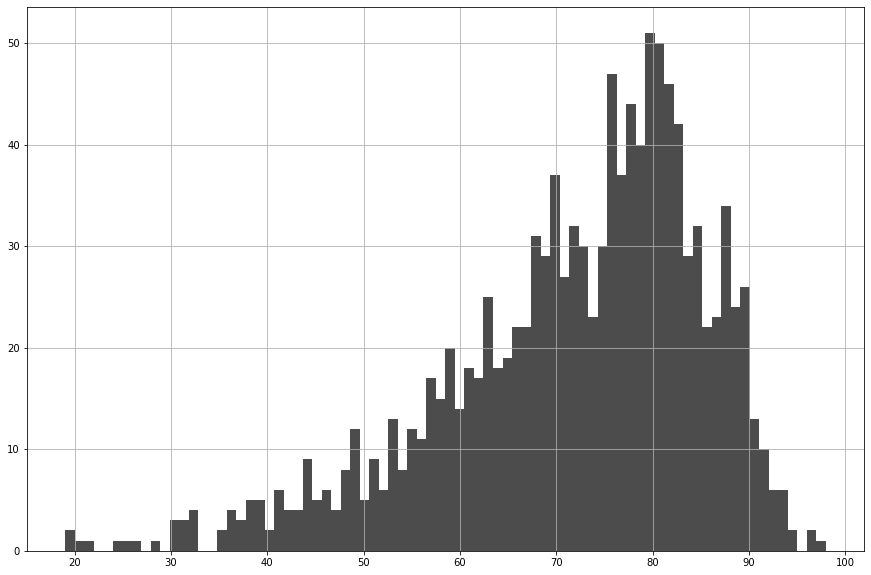

In [23]:
plt.figure(figsize=(15, 10))
games_genre['Critic_Score'].hist(alpha=0.7, bins = 80, color='#000')  

<div style='padding: 57px; background: #4F675F; border: 1.5px solid #000; color: #FFF; text-align:center'>
    p-value нам сказал о ровном отношении критиков к спортивным играм
</div>

<div style='padding: 66px'></div>

<p>2.</p>
<div style='padding: 57px; background: #CEEBE1; border: 2px solid #BAC29B; color: #535744; text-align:center'>Критикам нравятся больше игры на PC или на PS4?</div>

- - выдвигаем две гипотезы, ниже, и по тестам посмотрим какая игра нравится  критикам

## H0 - Критики одинаково относится к данным платформам 
## H1 - У критиков есть предпочтения 
### H1.1 - PC
### H1.2 - PS4

- создаем новый df, фильтруя необходимые жанры, удаляем строки с NaN в столбце Critic_Count

In [24]:
platform = games[((games['Platform'] == 'PC') ) | ((games['Platform'] == 'PS4') )]

games_ps4 = games.loc[(games['Platform'].isin(['PS4']))]
games_ps4 = games_ps4.dropna(subset=['Critic_Count'])

games_pс = games.loc[(games['Platform'].isin(['PC'])) ]
games_pс = games_pс.dropna(subset=['Critic_Count'])

## односторонним тестом находим, какая игра критикам нравится

In [25]:
alpha = 0.05
result = st.ttest_ind(games_ps4['Critic_Score'], games_pс['Critic_Score'], equal_var=False)
result_ps4 = st.ttest_1samp(games_ps4['Critic_Score'], 75, alternative='less')
result_pc = st.ttest_1samp(games_pс['Critic_Score'], 75, alternative='less')

print(f'Критерий Стьюдента(p-value) - {result.pvalue}\n\
t-критерий - \n\tплатформа PC {result_pc.pvalue}\n\tплатформа PS4 {result_ps4.pvalue}\n')


if result_ps4.pvalue < result_pc.pvalue:
    win = 'PC'
else:
    win = 'PS4'
    
    
if (result.pvalue < alpha):
    print(F'Отвергаем нулевую гипотезу, критики предпочитают платформу {win} ')
    
else:
    print(F'Не отвергаем нулевую гипотезу')

Критерий Стьюдента(p-value) - 2.067249157283479e-05
t-критерий - 
	платформа PC 0.9867345848207241
	платформа PS4 0.00013340490173804854

Отвергаем нулевую гипотезу, критики предпочитают платформу PC 


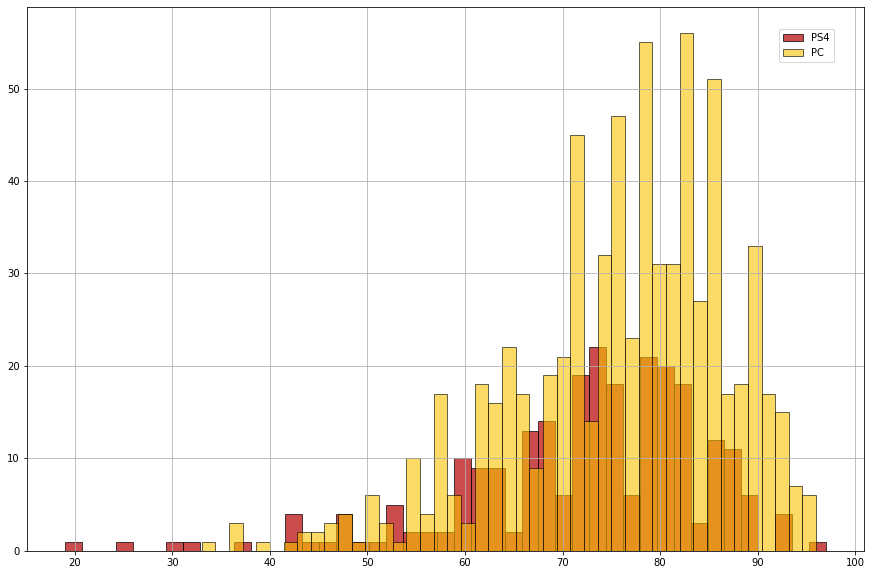

In [26]:
two_histograms(games_ps4['Critic_Score'], games_pс['Critic_Score'], 'PS4', 'PC')

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

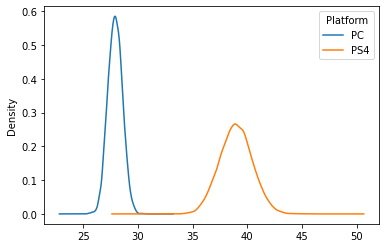

In [27]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(10000):
    boot_mean = platform.sample(frac=1, replace=True).groupby(
        'Platform')['Critic_Count'].mean()  
    boot_1d.append(boot_mean)


boot_1d = pd.DataFrame(boot_1d)


boot_1d.plot(kind='density')
  

<div style='padding: 57px; background: #4F675F; border: 1.5px solid #000; color: #FFF; text-align:center'>
     p-value показывает явное преобладание платформы PC, а так же графики не противоречат этому
</div>

<div style='padding: 66px'></div>

<p>3.</p>
<div style='padding: 57px; background: #CEEBE1; border: 2px solid #BAC29B; color: #535744; text-align:center'>Критикам больше нравятся стрелялки или стратегии?</div>

## H0 - Критиком больше нравятся стрелялки 
## H1 - Критиком больше нравятся стратегии 

In [28]:
better = games.loc[(games['Genre'].isin(['Strategy'])) | (games['Genre'].isin(['Shooter']))]
Strategy = games.loc[(games['Genre'].isin(['Strategy']))]
Strategy = Strategy.dropna(subset=['Critic_Count'])

Shooter = games.loc[(games['Genre'].isin(['Shooter']))]
Shooter = Shooter.dropna(subset=['Critic_Count'])

In [29]:
a = 0.05

result = st.ttest_ind(Strategy['Critic_Score'], Shooter['Critic_Score'], equal_var=False)
Strategy_samp = st.ttest_1samp(Strategy['Critic_Score'], 75, alternative='greater')
Shooter_samp = st.ttest_1samp(Shooter['Critic_Score'], 75, alternative='greater')

print(f'Критерий Стьюдента(p-value) по количеству критиков - {result.pvalue}\n\
t-критерий - \n\tстрелялки {result_pc.pvalue}\n\tстратегии {result_ps4.pvalue}\n')


if Strategy_samp.pvalue < Shooter_samp.pvalue:
    win = 'Стрелялки '
else:
    win = 'Стратегии '
    
    
if result.pvalue < a:
    print(F'Отвергаем нулевую гипотезу, критики предпочитают жанр - {win}')
    
else:
    print(F'Не отвергаем нулевую гипотезу')

Критерий Стьюдента(p-value) по количеству критиков - 0.021938989522304823
t-критерий - 
	стрелялки 0.9867345848207241
	стратегии 0.00013340490173804854

Отвергаем нулевую гипотезу, критики предпочитают жанр - Стрелялки 


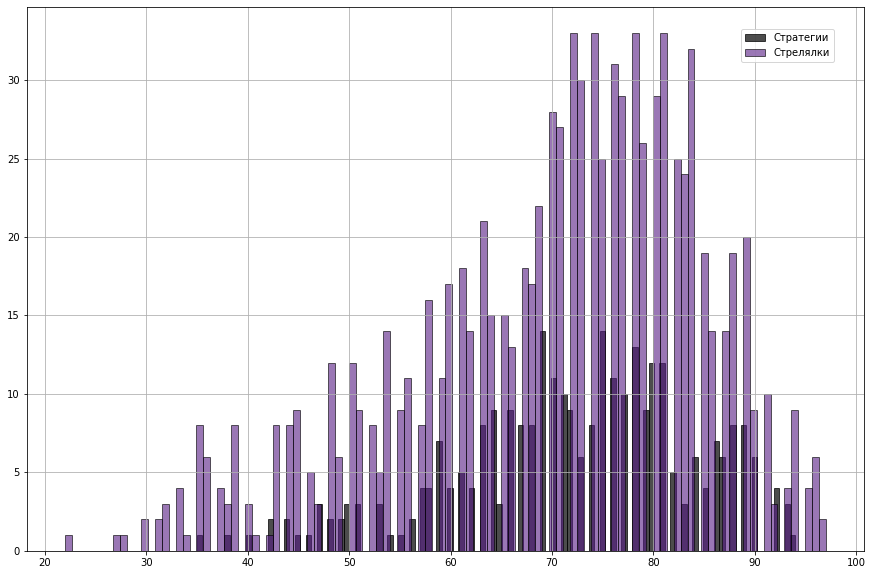

In [30]:
two_histograms(Strategy['Critic_Score'], Shooter['Critic_Score'], bs=110, c1='#000', c2='#571D85', \
               label1='Стратегии', label2='Стрелялки')

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

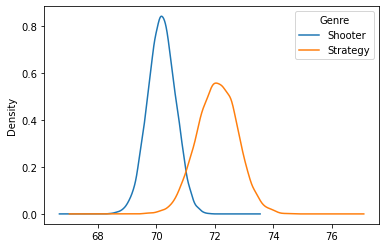

In [31]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(10000):
    boot_mean = better.sample(frac=1, replace=True).groupby(
        'Genre')['Critic_Score'].mean()  
    boot_1d.append(boot_mean)


boot_1d = pd.DataFrame(boot_1d)


boot_1d.plot(kind='density')

<div style='padding: 57px; background: #4F675F; border: 1.5px solid #000; color: #FFF; text-align:center'>
     гистограмма + p-value + Bootstrap = стрелялки
</div>

# Заданние 2

In [32]:
import pandas as pd

message = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
message.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### посмотрим распределение 

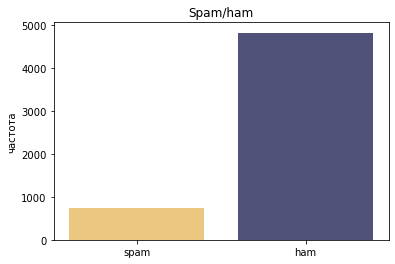

In [33]:
import matplotlib.pyplot as plt

ham= len([i for i in message['Category'] if i == 'ham'])
spam = len([i for i in message['Category'] if i == 'spam'])

plt.title('Spam/ham')
cat = ['spam', 'ham']
freq = [spam,ham]
plt.ylabel('частота')
plt.bar(cat,freq,color= ['#EBC782','#505178'])
plt.show()

1) преобразуем столбец с сообщениями в список сообщений, переводя в нижний регистр



In [4]:
list_mess = list(message["Message"].str.lower())
list_mess[:2]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...']

2) Убирай мусор 



In [5]:
import re

list_mess = [re.sub('[\W_]+', ' ', text) for text in list_mess] 
list_mess[:2]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ',
 'ok lar joking wif u oni ']

In [36]:
# разбиваем строку на список слов 
words = [text.split() for text in list_mess]   
words[:2]

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

3) Убираем стоп слова 

In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if word not in stopwords_set] for text in words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anfisso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4) lemmatization -> нормальная форма слов

In [8]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

norm = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]

[nltk_data] Downloading package wordnet to /Users/anfisso/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# преобразуем строку обратно в столбец 
message['Message_'] = [' '.join(text) for text in without_sw]
message.head()

,Category,Message,Message_
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


5) вектора TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(message.Message_)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

6) Разделяем - Тестовые, тренировочные данные



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, message['Category'], test_size = 0.3, random_state = 42)


7) Модель логистической регрессии 

In [12]:
from sklearn.linear_model import LogisticRegression

lda = LogisticRegression(random_state=42)
lda.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [13]:
lda.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [14]:
lda.predict_proba(X_test)

array([[0.93008063, 0.06991937],
       [0.8726776 , 0.1273224 ],
       [0.95938762, 0.04061238],
       ...,
       [0.96328407, 0.03671593],
       [0.44849252, 0.55150748],
       [0.96498597, 0.03501403]])

- оцениваем точность 

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9569377990430622

8) результаты

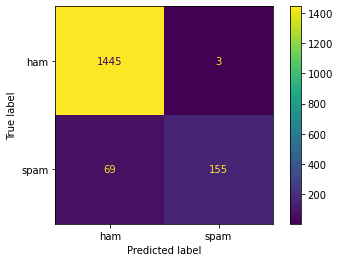

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lda, X_test, y_test)

9) датафрейм

In [17]:
# колонка с предсказаниями
X_test['Predict'] = lda.predict(X_test)
# объединение по индексам
df_final = X_test.join(message)
df_final = df_final.loc[df_final['Category'] != df_final['Predict'], ['Category', 'Message', 'Predict']]
df_final

/var/folders/cq/j6d5znl136gbtfhhcd1pbwbh0000gn/T/ipykernel_5585/160335105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predict'] = lda.predict(X_test)


,Category,Message,Predict
2952,ham,Hey now am free you can call me.,spam
881,spam,Reminder: You have not downloaded the content ...,ham
1961,spam,Guess what! Somebody you know secretly fancies...,ham
3864,spam,Oh my god! I've found your number again! I'm s...,ham
2575,spam,Your next amazing xxx PICSFREE1 video will be ...,ham
...,...,...,...
4543,spam,FreeMsg Hi baby wow just got a new cam moby. W...,ham
752,spam,You have an important customer service announc...,ham
309,spam,TheMob> Check out our newest selection of cont...,ham
495,ham,Are you free now?can i call now?,spam


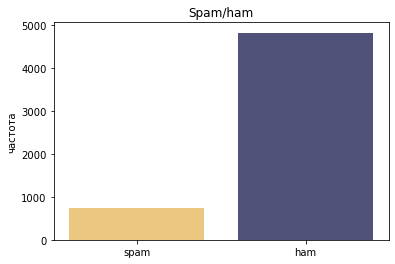

In [18]:
ham2 = len([i for i in X_test['Predict'] if i == 'ham'])
spam2 = len([i for i in X_test['Predict'] if i == 'spam'])

plt.title('Spam/ham')
cat = ['spam', 'ham']
freq = [spam,ham]
plt.ylabel('частота')
plt.bar(cat,freq,color= ['#EBC782','#505178'])
plt.show()